In [227]:
import pandas as pd

whr_df = pd.read_csv('2016.csv')

In [228]:
whr_df.head()

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


In [229]:
whr_df.describe()

,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000
mean,78.980892,5.382185,5.282395,5.481975,0.953880,0.793621,0.557619,0.370994,0.137624,0.242635,2.325807
std,45.466030,1.141674,1.148043,1.136493,0.412595,0.266706,0.229349,0.145507,0.111038,0.133756,0.542220
min,1.000000,2.905000,2.732000,3.078000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.817890
25%,40.000000,4.404000,4.327000,4.465000,0.670240,0.641840,0.382910,0.257480,0.061260,0.154570,2.031710
50%,79.000000,5.314000,5.237000,5.419000,1.027800,0.841420,0.596590,0.397470,0.105470,0.222450,2.290740
75%,118.000000,6.269000,6.154000,6.434000,1.279640,1.021520,0.729930,0.484530,0.175540,0.311850,2.664650
max,157.000000,7.526000,7.460000,7.669000,1.824270,1.183260,0.952770,0.608480,0.505210,0.819710,3.837720


In [230]:
whr_df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Lower Confidence Interval        0
Upper Confidence Interval        0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [231]:
import matplotlib.pyplot as plt
import seaborn as sns 
import plotnine as pln
import plotly  as ply

<Figure size 1200x800 with 0 Axes>

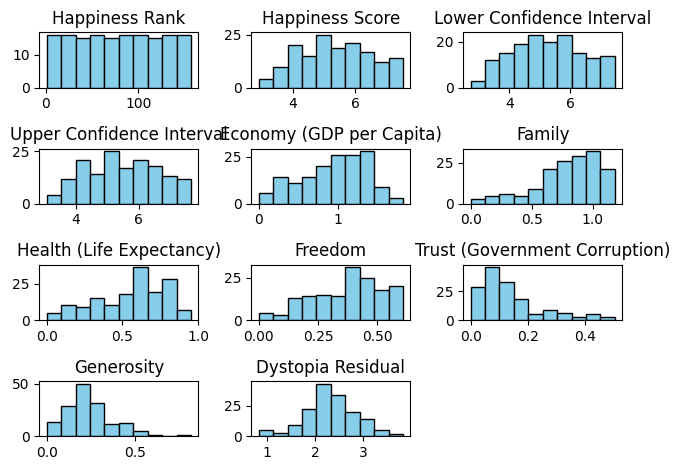

In [232]:
plt.figure(figsize=(12, 8))
whr_df.hist(bins=10, color='skyblue', edgecolor='black', grid=False)
plt.tight_layout()
plt.show()

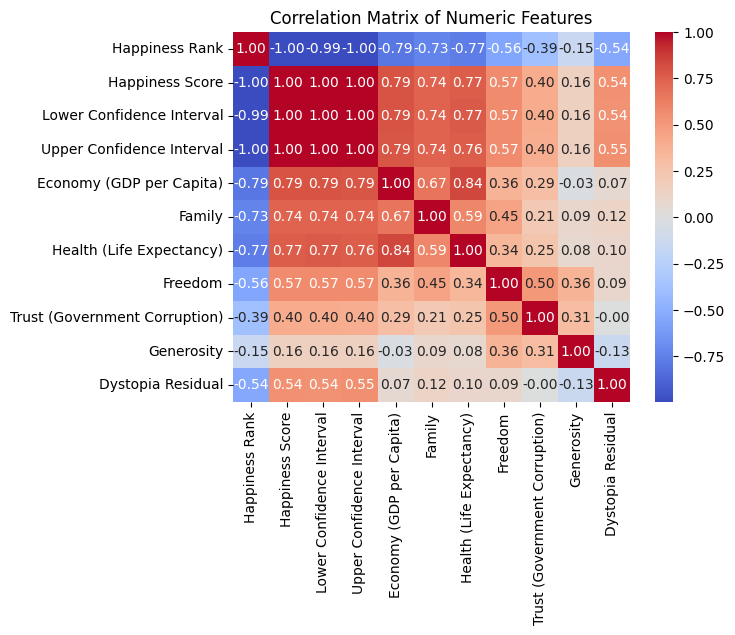

In [233]:
numeric_columns = whr_df.select_dtypes(include=['number'])
correlation_matrix = numeric_columns.corr()
sns.heatmap(correlation_matrix,annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numeric Features')
plt.show()

Visualization with Plotnine:
- Global Happiness Scores: Create a bar chart of happiness scores across countries.
- Economic Impact on Happiness: Use a scatter plot to explore the relationship between GDP per capita and happiness scores.
- Regional Comparisons: Generate boxplots to compare happiness scores across regions.
- Correlation Heatmap: Visualize the correlation between different factors using a heatmap.

In [234]:
whr_df.head()

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


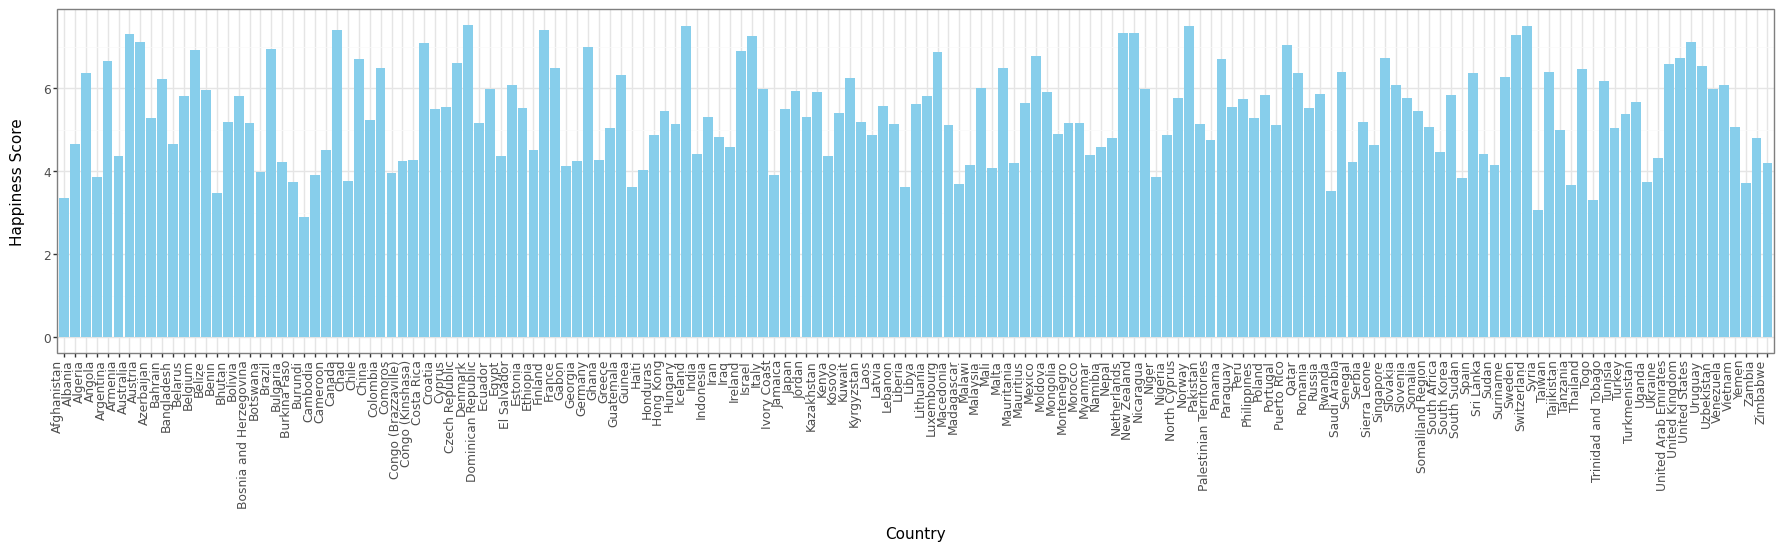

In [235]:
from plotnine import ggplot, aes, geom_bar, theme_bw, theme, element_text
bar_chart = (
    ggplot(whr_df, aes(x='Country', y='Happiness Score')) +
    geom_bar(stat='identity', fill='skyblue') +
    theme_bw() +
    theme(axis_text_x = element_text(angle = 90, hjust = 1))+
    theme(figure_size=(18,18))+
    theme(aspect_ratio=0.2))

bar_chart.draw()

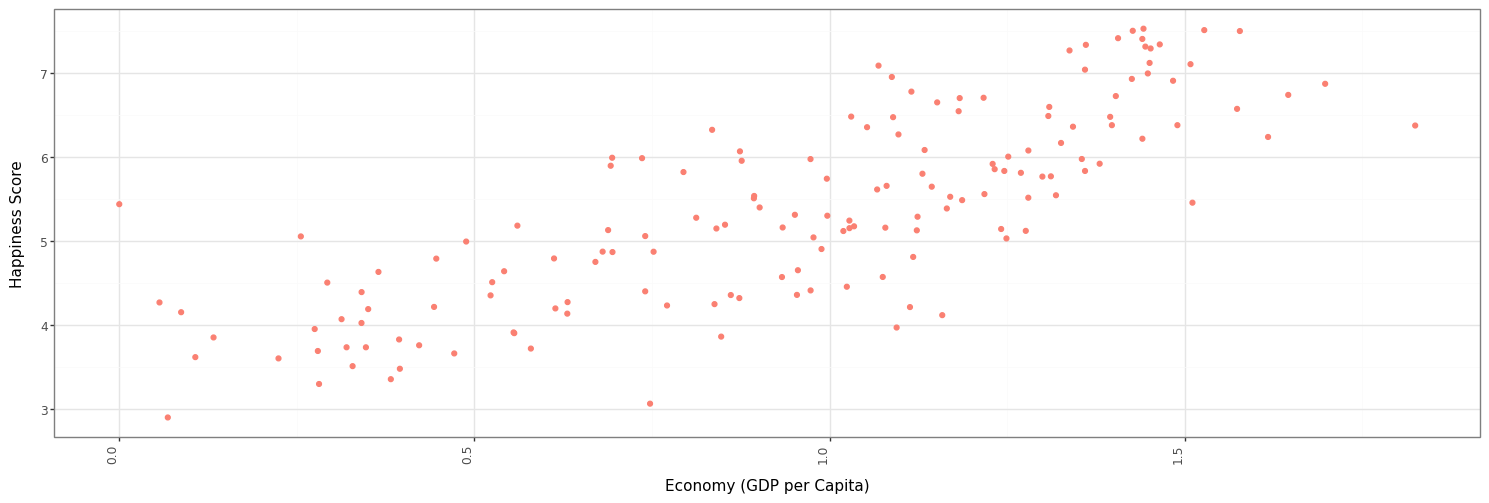

In [236]:
from plotnine import *
scatter_plot = (
    ggplot(whr_df, aes(x='Economy (GDP per Capita)', y='Happiness Score')) +
    geom_point(stat='identity', color='salmon') +
    theme_bw() +
    theme(axis_text_x = element_text(angle = 90, hjust = 1))+
    theme(figure_size=(15,15))+
    theme(aspect_ratio=0.3))
    

scatter_plot.draw()

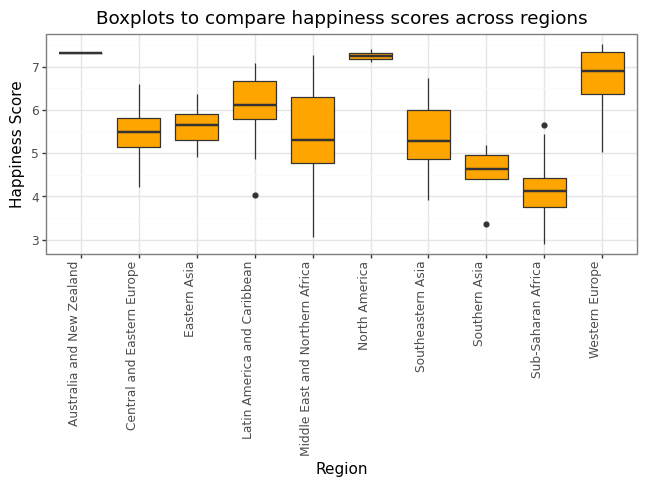

In [237]:
from plotnine import *
boxplot = (
    ggplot(whr_df, aes(x='Region', y='Happiness Score')) +
    geom_boxplot(fill='orange') +
    theme_bw() +
    theme(axis_text_x = element_text(angle = 90, hjust = 1))+
    ggtitle('Boxplots to compare happiness scores across regions')
    )
boxplot.draw()

In [238]:
whr_df.head()

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


In [239]:
from plotnine import ggplot, aes, geom_tile, scale_fill_gradient, theme_minimal

# Calculate the correlation matrix
numeric_columns = whr_df.select_dtypes(include=['number'])
correlation_matrix = numeric_columns.corr()

# Reshape the correlation matrix for plotting
correlation_matrix = correlation_matrix.unstack().reset_index()
correlation_matrix.columns = ['Happiness Score', 'Economy (GDP per Capita)', 'Health (Life Expectancy)','Generosity','Trust (Government Corruption)','Dystopia Residual','Freedom','Trust (Government Corruption)','Family','Region']

# Create the heatmap
heatmap = (
    ggplot() +
    aes(x='factor(corr_matrix$columns)', y='factor(corr_matrix$columns)', fill='corr') +
    geom_tile() +
    scale_fill_gradient(low='blue', high='red') +
    theme_minimal() +
    ggtitle('Correlation Heatmap')
)


# Display the heatmap
heatmap.draw()

ValueError: Length mismatch: Expected axis has 3 elements, new values have 10 elements

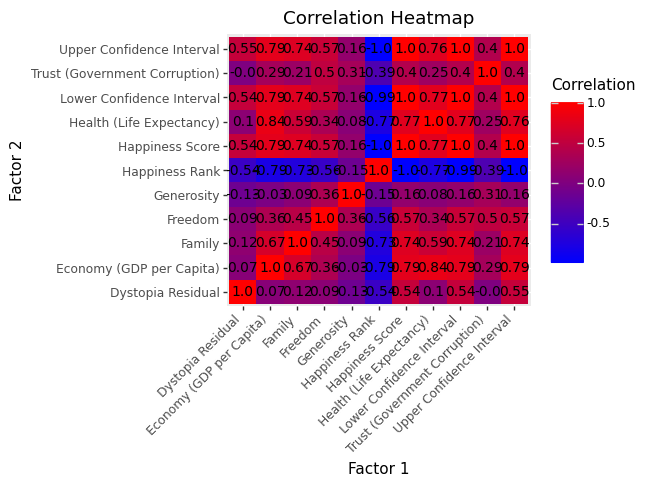

In [ ]:
from plotnine import ggplot, aes, geom_tile, scale_fill_gradient, theme_minimal

# Selecting only numeric columns for calculating the correlation matrix
numeric_columns = whr_df.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numeric_columns.corr().unstack().reset_index()
correlation_matrix.columns = ['Factor 1', 'Factor 2', 'Correlation']

heatmap = (
    ggplot(correlation_matrix, aes(x='Factor 1', y='Factor 2', fill='Correlation')) +
    geom_tile() +
    scale_fill_gradient(low='blue', high='red') +
    geom_text(aes(label='round(Correlation, 2)'), size=10, color='black') +
    ggtitle('Correlation Heatmap')+
    theme(axis_text_x=element_text(rotation=45, hjust=1))
)

heatmap.draw()


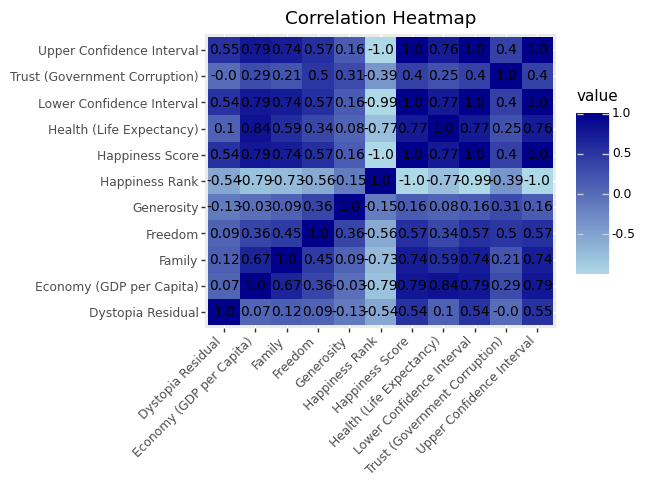

In [ ]:
from plotnine import *
numeric_columns = whr_df.select_dtypes(include=['number']).columns
correlation_matrix = whr_df[numeric_columns].corr()
p4 = (
    ggplot(pd.melt(correlation_matrix.reset_index(), id_vars='index'), aes(x='variable', y='index', fill='value')) +
    geom_tile() +
    geom_text(aes(label='round(value, 2)'), size=10, color='black') +
    scale_fill_gradient(low="lightblue", high="darkblue") +
    theme(axis_text_x=element_text(rotation=45, hjust=1)) +
    labs(title='Correlation Heatmap', x='', y='')
)

p4.draw()

Interactive Visualizations with Plotly:
- Interactive World Map: Create an interactive map displaying happiness scores across different countries.
- Dynamic Scatter Plot: Plot an interactive scatter plot exploring relationships between various factors like health, freedom, and happiness.
- Factor Analysis: Use a bubble chart to visualize the impact of social support and generosity on happiness scores, with bubble size representing country population.



In [ ]:
import plotly.express as px

# Assuming df contains the DataFrame with happiness scores and coordinates
# Replace 'Score' with the column name containing happiness scores
fig = px.choropleth(whr_df, 
                    locations='Country', 
                    locationmode='country names',
                    color='Happiness Score',
                    color_continuous_scale='Viridis',
                    range_color=(0, whr_df['Happiness Score'].max()),# creating a scale
                    title='Happiness Scores Across Countries',
                    hover_name='Country',
                    hover_data='Happiness Score',
                    labels={'Score': 'Happiness Score'}
                   )

fig.update_geos(projection_type="orthographic", showcoastlines=True, coastlinecolor="Black", showland=True, landcolor="LightGreen", showocean=True, oceancolor="LightBlue")
fig.show()

In [ ]:
whr_df.head()

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


In [ ]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Creating subplots
fig = make_subplots(rows=1, cols=3)
fig.add_trace(go.Scatter(x=whr_df['Happiness Score'], y=whr_df['Freedom'],mode='markers'), row=1, col=1)
fig.add_trace(go.Scatter(x=whr_df['Happiness Score'], y=whr_df['Health (Life Expectancy)'],mode='markers'), row=1, col=2)
fig.add_trace(go.Scatter(x=whr_df['Freedom'], y=whr_df['Health (Life Expectancy)'],mode='markers'), row=1, col=3)
fig.show()

In [ ]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Creating subplots
fig = make_subplots(rows=1, cols=3)

# Adding traces with customizations
fig.add_trace(
    go.Scatter(
        x=whr_df['Happiness Score'],
        y=whr_df['Freedom'],
        mode='markers',
        marker=dict(color='skyblue', size=8),
        hoverinfo='text',
        text=whr_df['Country'],  # Display country name on hover
        name='Freedom vs Happiness'
    ),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(
        x=whr_df['Happiness Score'],
        y=whr_df['Health (Life Expectancy)'],
        mode='markers',
        marker=dict(color='green', size=8),
        hoverinfo='text',
        text=whr_df['Country'],  # Display country name on hover
        name='Health vs Happiness'
    ),
    row=1, col=2
)

fig.add_trace(
    go.Scatter(
        x=whr_df['Freedom'],
        y=whr_df['Health (Life Expectancy)'],
        mode='markers',
        marker=dict(color='orange', size=8),
        hoverinfo='text',
        text=whr_df['Country'],  # Display country name on hover
        name='Health vs Freedom'
    ),
    row=1, col=3
)

# Customizing layout
fig.update_layout(
    title='Relationships between Happiness, Freedom, and Health',
    xaxis=dict(title='Happiness Score'),
    yaxis=dict(title='Freedom'),
    xaxis2=dict(title='Happiness Score'),
    yaxis2=dict(title='Health (Life Expectancy)'),
    xaxis3=dict(title='Freedom'),
    yaxis3=dict(title='Health (Life Expectancy)'),
    showlegend=True,
    legend=dict(orientation='h', yanchor='bottom', y=1.02, xanchor='right', x=1)
)


fig.show()

In [ ]:
df_2019 = pd.read_csv('2019.csv')

In [ ]:
df_2019

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035


In [ ]:
import plotly.graph_objects as go

fig = go.Figure(data=go.Scatter(
    x=df_2019['Score'],  
    y=df_2019['Freedom to make life choices'],         
    mode='markers',              
    marker=dict(
        size=df_2019['Healthy life expectancy'] * 10,  
        color=df_2019['Healthy life expectancy'],     
        colorscale='Viridis',                         
        colorbar=dict(title='Healthy life expectancy'), 
    ),
    text=df_2019['Country or region'],         
))


fig.update_layout(
    title='Bubble Chart of Happiness and Freedom',
    xaxis=dict(title='Happiness Score'),
    yaxis=dict(title='Freedom'),
)


fig.show()

In [ ]:
import plotly.graph_objects as go


df_2019['Flipped_rank'] = (180-df_2019['Overall rank'])
fig = px.scatter(df_2019, 
                 x="Social support", 
                 y="Generosity", 
                 size= "Flipped_rank", 
                 color="Score", 
                 hover_name="Country or region",
                 title="Bubble Chart: Social Support, Generosity, and Happiness")
fig.update_layout(legend_orientation="h", legend=dict(x=0, y=1, traceorder="normal"),
                  margin=dict(l=0, r=0, t=30, b=0))


fig.update_layout(
    title='Bubble Chart of Happiness and Freedom',
    xaxis=dict(title='Happiness Score'),
    yaxis=dict(title='Freedom')
)


fig.show()

Advanced Analysis:
- Perform a multi-variable analysis and visualize it using an interactive Plotly chart.
- Explore time-series aspects if temporal data is available, or compare with another year’s dataset.



In [ ]:
whr_df.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Lower Confidence Interval', 'Upper Confidence Interval',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual'],
      dtype='object')

In [ ]:
whr_df.head()

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


In [ ]:
import plotly.graph_objects as go

# Assuming df contains the DataFrame with the relevant variables

fig = go.Figure(data=[go.Scatter3d(
    x=whr_df['Economy (GDP per Capita)'],
    y=whr_df['Health (Life Expectancy)'],
    z=whr_df['Freedom'],
    mode='markers',
    marker=dict(
        color=whr_df['Generosity'],  # Color based on Generosity
        colorscale='Viridis',    # Specify a color scale
        size=8,
        opacity=0.8
    ),
    text=whr_df['Country']  # Display country name on hover
)])

fig.update_layout(
    scene=dict(
        xaxis=dict(title='Economy (GDP per Capita)'),
        yaxis=dict(title='Health (Life Expectancy)'),
        zaxis=dict(title='Freedom'),
    ),
    title='Multi-variable Analysis',
    margin=dict(l=0, r=0, b=0, t=30)  # Adjust margins for better visualization
)

fig.show()


In [ ]:
import plotly.graph_objects as go

# Assuming whr_df contains the DataFrame with the relevant variables

fig = go.Figure(data=[go.Scatter3d(
    x=whr_df['Economy (GDP per Capita)'],
    y=whr_df['Health (Life Expectancy)'],
    z=whr_df['Freedom'],
    mode='markers',
    marker=dict(
        color=whr_df['Freedom'],  # Color based on Generosity
        colorscale='Viridis',    # Specify a color scale
        size=whr_df['Happiness Score'],  # Size based on Happiness Rank
        opacity=0.8
    ),
    text=whr_df['Country']  # Display country name on hover
)])

fig.update_layout(
    scene=dict(
        xaxis=dict(title='Economy (GDP per Capita)'),
        yaxis=dict(title='Health (Life Expectancy)'),
        zaxis=dict(title='Freedom'),
    ),
    title='Multi-variable Analysis',
    margin=dict(l=0, r=0, b=0, t=30)  # Adjust margins for better visualization
)

fig.show()



In [ ]:
df_2019.head()
df_2019['Year'] = 2019

In [ ]:
df_2019.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Flipped_rank,Year
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,179,2019
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,178,2019
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,177,2019
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,176,2019
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,175,2019


In [243]:
whr_df['Year'] = 2016
whr_df.head()

,Country or region,Overall rank,Score,GDP per capita,Healthy life expectancy,Freedom to make life choices,Perceptions of corruption,Generosity,Year
0,Denmark,1,7.526,1.44178,0.79504,0.57941,0.44453,0.36171,2016
1,Switzerland,2,7.509,1.52733,0.86303,0.58557,0.41203,0.28083,2016
2,Iceland,3,7.501,1.42666,0.86733,0.56624,0.14975,0.47678,2016
3,Norway,4,7.498,1.57744,0.79579,0.59609,0.35776,0.37895,2016
4,Finland,5,7.413,1.40598,0.81091,0.57104,0.41004,0.25492,2016


In [244]:
whr_df.drop(columns=['Lower Confidence Interval','Upper Confidence Interval','Family','Dystopia Residual'], inplace=True)

# Rename the columns in dataframe2 to match dataframe1
whr_df.rename(columns={'Happiness Rank':'Overall rank',
    'Happiness Score': 'Score',
    'Economy (GDP per Capita)': 'GDP per capita',
    'Health (Life Expectancy)': 'Healthy life expectancy',
    'Trust (Government Corruption)': 'Perceptions of corruption',
    'Freedom':'Freedom to make life choices'
}, inplace=True)

df_2019.drop(columns=['Flipped_rank','Social support'],inplace=True)


KeyError: "['Lower Confidence Interval', 'Upper Confidence Interval', 'Family', 'Dystopia Residual'] not found in axis"

In [245]:
df_2019.head()

,Overall rank,Country or region,Score,GDP per capita,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Year
0,1,Finland,7.769,1.340,0.986,0.596,0.153,0.393,2019
1,2,Denmark,7.600,1.383,0.996,0.592,0.252,0.410,2019
2,3,Norway,7.554,1.488,1.028,0.603,0.271,0.341,2019
3,4,Iceland,7.494,1.380,1.026,0.591,0.354,0.118,2019
4,5,Netherlands,7.488,1.396,0.999,0.557,0.322,0.298,2019


In [246]:
whr_df.drop(columns=['Region'],inplace=True)
whr_df.rename(columns={'Country':"Country or region"},inplace=True)
whr_df.head()

KeyError: "['Region'] not found in axis"

In [247]:
whr_df.head()

,Country or region,Overall rank,Score,GDP per capita,Healthy life expectancy,Freedom to make life choices,Perceptions of corruption,Generosity,Year
0,Denmark,1,7.526,1.44178,0.79504,0.57941,0.44453,0.36171,2016
1,Switzerland,2,7.509,1.52733,0.86303,0.58557,0.41203,0.28083,2016
2,Iceland,3,7.501,1.42666,0.86733,0.56624,0.14975,0.47678,2016
3,Norway,4,7.498,1.57744,0.79579,0.59609,0.35776,0.37895,2016
4,Finland,5,7.413,1.40598,0.81091,0.57104,0.41004,0.25492,2016


In [248]:
df_2019.head()

,Overall rank,Country or region,Score,GDP per capita,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Year
0,1,Finland,7.769,1.340,0.986,0.596,0.153,0.393,2019
1,2,Denmark,7.600,1.383,0.996,0.592,0.252,0.410,2019
2,3,Norway,7.554,1.488,1.028,0.603,0.271,0.341,2019
3,4,Iceland,7.494,1.380,1.026,0.591,0.354,0.118,2019
4,5,Netherlands,7.488,1.396,0.999,0.557,0.322,0.298,2019


In [249]:
# Concatenate the two DataFrames
union_df = pd.concat([df_2019,whr_df], ignore_index=True)

# Display the result
union_df

,Overall rank,Country or region,Score,GDP per capita,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Year
0,1,Finland,7.769,1.34000,0.98600,0.59600,0.15300,0.39300,2019
1,2,Denmark,7.600,1.38300,0.99600,0.59200,0.25200,0.41000,2019
2,3,Norway,7.554,1.48800,1.02800,0.60300,0.27100,0.34100,2019
3,4,Iceland,7.494,1.38000,1.02600,0.59100,0.35400,0.11800,2019
4,5,Netherlands,7.488,1.39600,0.99900,0.55700,0.32200,0.29800,2019
...,...,...,...,...,...,...,...,...,...
308,153,Benin,3.484,0.39499,0.21028,0.39747,0.20180,0.06681,2016
309,154,Afghanistan,3.360,0.38227,0.17344,0.16430,0.31268,0.07112,2016
310,155,Togo,3.303,0.28123,0.24811,0.34678,0.17517,0.11587,2016
311,156,Syria,3.069,0.74719,0.62994,0.06912,0.48397,0.17233,2016


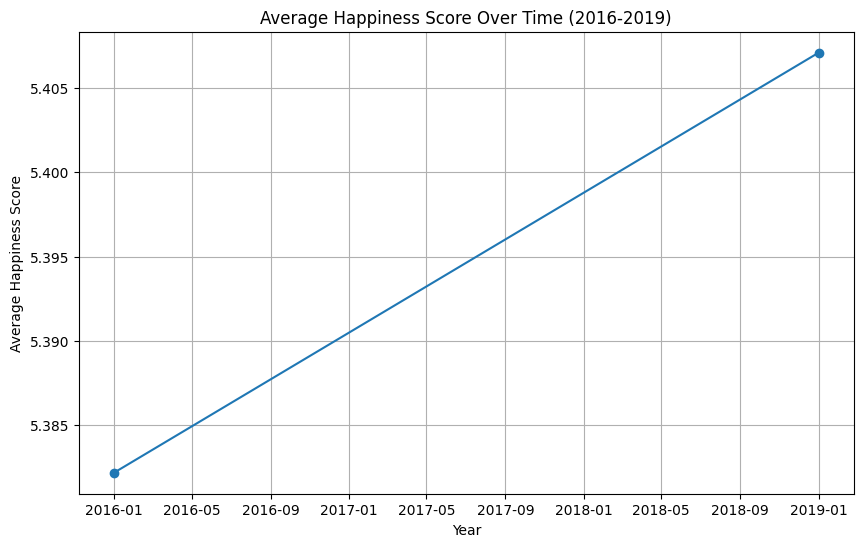

In [259]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
# Assuming union_df contains the union dataset
# Replace 'Year' and 'Score' with actual column names
union_df['Year'] = pd.to_datetime(union_df['Year'], format='%Y')

# Group by year and calculate the average score for each year
average_score_by_year = union_df.groupby('Year')['Score'].mean()

# Plot the average happiness score over time
plt.figure(figsize=(10, 6))
plt.plot(average_score_by_year.index, average_score_by_year.values, marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Average Happiness Score')
plt.title('Average Happiness Score Over Time (2016-2019)')
plt.grid(True)
plt.show()

C:\Users\v_gol\AppData\Local\Temp\ipykernel_10808\729642157.py:24: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx 

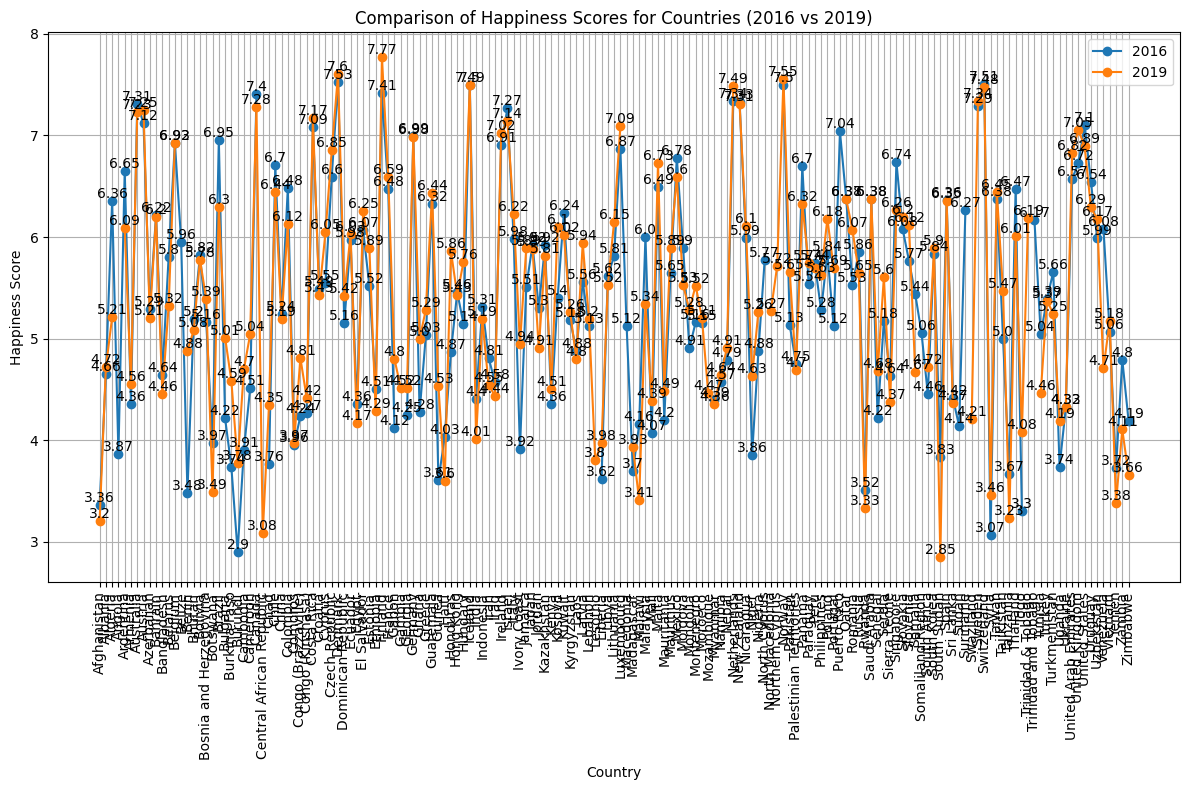

In [262]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
# Assuming union_df contains the union dataset
# Replace 'Year', 'Country or region', and 'Score' with actual column names
union_df['Year'] = pd.to_datetime(union_df['Year'], format='%Y')

# Pivot the dataframe to have years as columns and countries as rows
pivot_df = union_df.pivot(index='Country or region', columns='Year', values='Score')

# Plot the scores for each country over the two years
plt.figure(figsize=(12, 8))
plt.plot(pivot_df.index, pivot_df[pivot_df.columns[0]], label='2016', marker='o')
plt.plot(pivot_df.index, pivot_df[pivot_df.columns[1]], label='2019', marker='o')

# Add labels and title
plt.xlabel('Country')
plt.ylabel('Happiness Score')
plt.title('Comparison of Happiness Scores for Countries (2016 vs 2019)')
plt.xticks(rotation=90)

# Add country names to x-axis
plt.gca().set_xticklabels(pivot_df.index)

# Add values for each year
for country in pivot_df.index:
    plt.text(country, pivot_df.loc[country, pivot_df.columns[0]], str(round(pivot_df.loc[country, pivot_df.columns[0]], 2)), ha='center', va='bottom')
    plt.text(country, pivot_df.loc[country, pivot_df.columns[1]], str(round(pivot_df.loc[country, pivot_df.columns[1]], 2)), ha='center', va='bottom')

plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

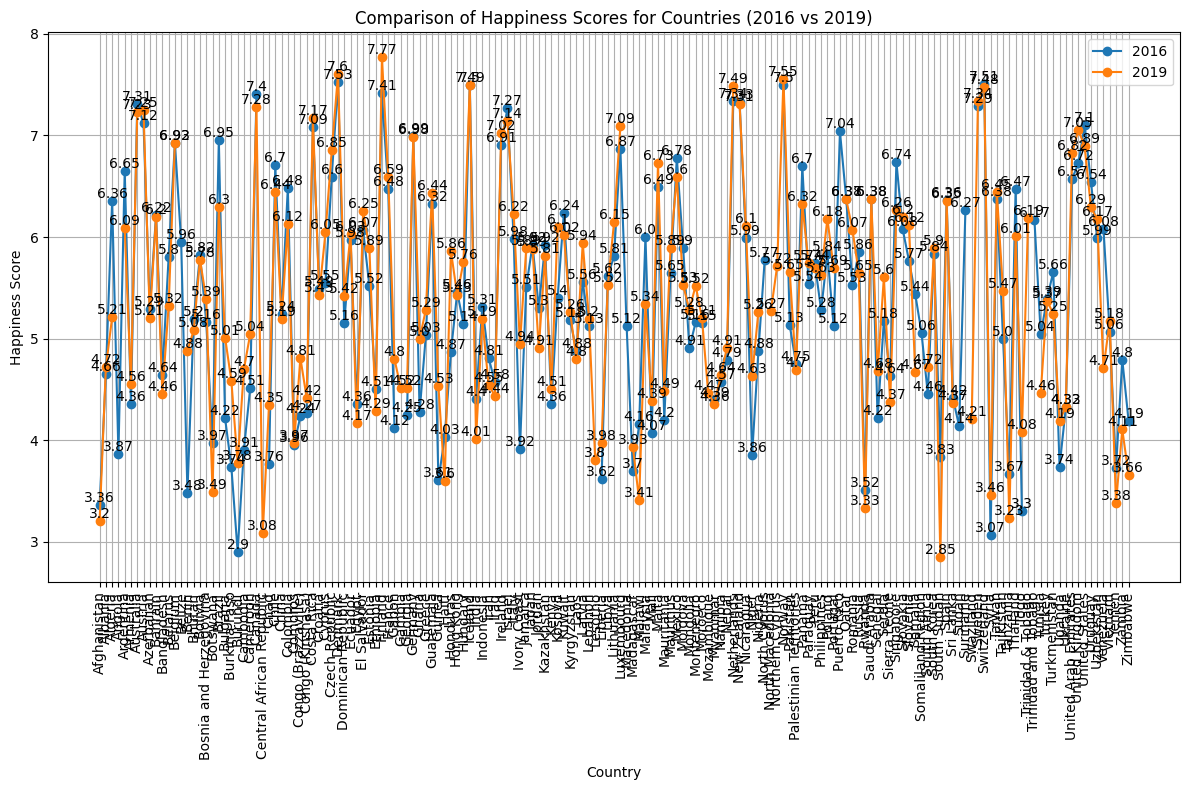

In [263]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
# Assuming union_df contains the union dataset
# Replace 'Year', 'Country or region', and 'Score' with actual column names
union_df['Year'] = pd.to_datetime(union_df['Year'], format='%Y')

# Pivot the dataframe to have years as columns and countries as rows
pivot_df = union_df.pivot(index='Country or region', columns='Year', values='Score')

# Plot the scores for each country over the two years
plt.figure(figsize=(12, 8))
plt.plot(pivot_df.index, pivot_df[pivot_df.columns[0]], label='2016', marker='o')
plt.plot(pivot_df.index, pivot_df[pivot_df.columns[1]], label='2019', marker='o')

# Add labels and title
plt.xlabel('Country')
plt.ylabel('Happiness Score')
plt.title('Comparison of Happiness Scores for Countries (2016 vs 2019)')
plt.xticks(rotation=90)

# Add country names to x-axis
plt.xticks(range(len(pivot_df.index)), pivot_df.index)

# Add values for each year
for country in pivot_df.index:
    plt.text(pivot_df.index.get_loc(country), pivot_df.loc[country, pivot_df.columns[0]], str(round(pivot_df.loc[country, pivot_df.columns[0]], 2)), ha='center', va='bottom')
    plt.text(pivot_df.index.get_loc(country), pivot_df.loc[country, pivot_df.columns[1]], str(round(pivot_df.loc[country, pivot_df.columns[1]], 2)), ha='center', va='bottom')

plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


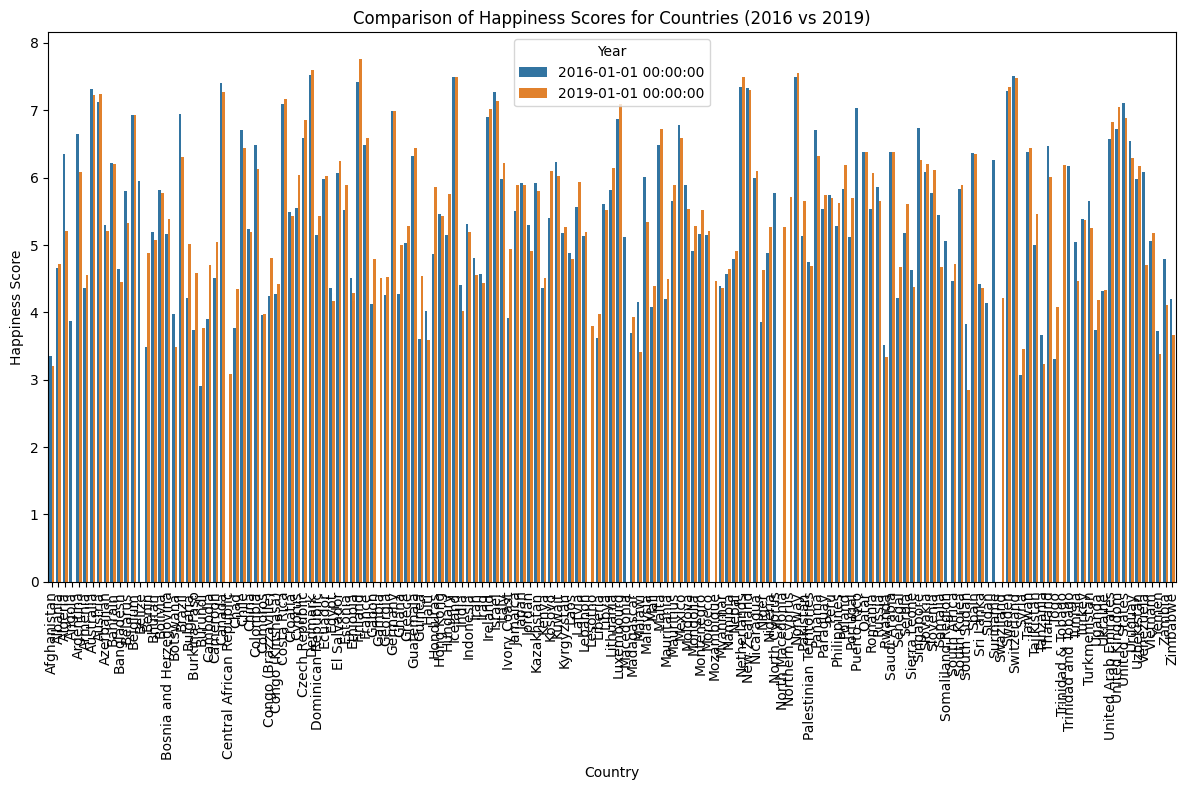

In [278]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
# Assuming union_df contains the union dataset
# Replace 'Year', 'Country or region', and 'Score' with actual column names
union_df['Year'] = pd.to_datetime(union_df['Year'], format='%Y')

# Pivot the dataframe to have years as columns and countries as rows
pivot_df = union_df.pivot(index='Country or region', columns='Year', values='Score').reset_index()

# Melt the dataframe to have each year as a separate column
melted_df = pivot_df.melt(id_vars='Country or region', value_vars=[pd.Timestamp('2016-01-01'), pd.Timestamp('2019-01-01')], var_name='Year', value_name='Score')

# Plot the comparison using seaborn
plt.figure(figsize=(12, 8))
sns.barplot(data=melted_df, x='Country or region', y='Score', hue='Year')
plt.xlabel('Country')
plt.ylabel('Happiness Score')
plt.title('Comparison of Happiness Scores for Countries (2016 vs 2019)')
plt.xticks(rotation=90)
plt.legend(title='Year')
plt.tight_layout()
plt.show()
